In [1]:
import json
import matplotlib.pyplot as plt

In [3]:
prompt_dirs = [
    "spatial-physical",
    "physical-temporal",
    "spatial-temporal",
    "spatial-temporal-physical",
]

In [24]:
results_per_llm = {k: {prompt: [] for prompt in prompt_dirs} for k in ['llama3:8b']}
for dir in prompt_dirs:
    prompts_json_filename = f"../{dir}/{dir}.json"
    with open(prompts_json_filename, "r") as prompts_file:
        prompts = json.load(prompts_file)
        for prompt in prompts:
            human = prompt["human_annotation"]
            correct = False
            for key in prompt["responses"].keys():
                try:
                    response = prompt["responses"][key]
                    if int(response) == human:
                        correct = True
                except ValueError as e:
                    pass
            results_per_llm[key][f"{dir}"].append(correct)

In [25]:
llama3_8b_percentages = {key: (round(sum(values) / len(values), 2) * 100)
               for key, values in results_per_llm["llama3:8b"].items()}

(0.0, 100.0)

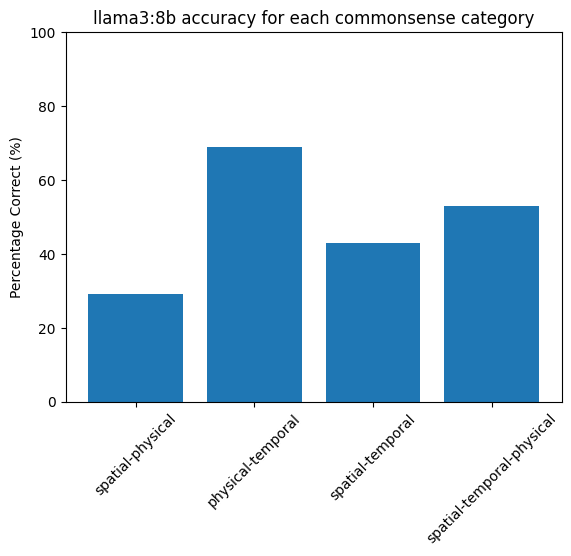

In [26]:
keys = list(llama3_8b_percentages.keys())
values = list(llama3_8b_percentages.values())

plt.bar(keys, values)
plt.ylabel('Percentage Correct (%)')
plt.title('llama3:8b accuracy for each commonsense category')
plt.xticks(rotation=45)
plt.ylim(0, 100)